In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

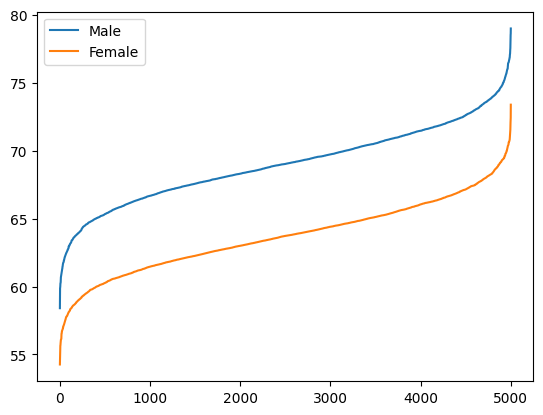

In [80]:
data = pd.read_csv('data/weight-height.csv')
data = data.sort_values('Height')
maleData = data[data['Gender']=="Male"]
# maleData = maleData.sort_values(by=['Height'],ascending=True)
femaleData = data[data['Gender']=="Female"]
# famaleData = femaleData.sort_values(by=['Height'],ascending=True)
plt.plot(range(5000),maleData['Height'],label='Male')
plt.plot(range(5000),femaleData['Height'],label='Female')
plt.legend()

In [67]:
def predict(x,w,b):
    return w*x+b

In [85]:
def costFunction(x,y,w,b):
    m = len(x)
    cost = (1/2*m)*np.sum(np.square(predict(x,w,b)-y))
    return cost

In [86]:
def gradientDescent(x,y,wInitial,bInitial,alpha,noOfIterations):
    w,b = wInitial,bInitial
    m = len(x)
    costHistory,wHistory,bHistory = np.array([]),np.array([]),np.array([])
    for i in range(noOfIterations):
        costHistory = np.append(costHistory,costFunction(x,y,w,b))
        wHistory = np.append(wHistory,w)
        bHistory = np.append(bHistory,b)
        if (i)%100==0:
            print("Iteration: ",i," Cost: ",costHistory[i]," w: ",wHistory[i]," b: ",bHistory[i])
        dw = (1/m)*np.sum((predict(x,w,b)-y)*x)
        db = (1/m)*np.sum((predict(x,w,b)-y))
        w,b = w-alpha*dw,b-alpha*db
    fig ,(distribution,cost) = plt.subplots(1,2,figsize=(12,6))
    distribution.scatter(x,y,marker='x',c='r')
    distribution.plot(x,predict(x,w,b),c='b')
    distribution.set_title('Distribution')
    distribution.set_xlabel('Height')
    distribution.set_ylabel('Weight')
    cost.plot(range(noOfIterations),costHistory)
    return w,b,costHistory,wHistory,bHistory

Iteration:  0  Cost:  235246834781.82584  w:  0.0  b:  0.0
Iteration:  100  Cost:  6431550346.686146  w:  1.8647828226155023  b:  0.028998197543102584
Iteration:  200  Cost:  2673429316.0699368  w:  2.103771015959017  b:  0.032522838186607256
Iteration:  300  Cost:  2611702631.7479  w:  2.1344020571463123  b:  0.03278286139517577
Iteration:  400  Cost:  2610686439.6295605  w:  2.138330646451419  b:  0.032624500817198976
Iteration:  500  Cost:  2610667371.6094017  w:  2.1388371265098343  b:  0.03241252155071852
Iteration:  600  Cost:  2610664680.605551  w:  2.1389050389112256  b:  0.03219367083899887
Iteration:  700  Cost:  2610662258.586105  w:  2.1389167457435003  b:  0.031973939673953816
Iteration:  800  Cost:  2610659840.988773  w:  2.138921249429406  b:  0.031754095843833464
Iteration:  900  Cost:  2610657423.468321  w:  2.1389248299781576  b:  0.03153423774616611
Iteration:  1000  Cost:  2610655005.953381  w:  2.138928292217628  b:  0.031314377991295134


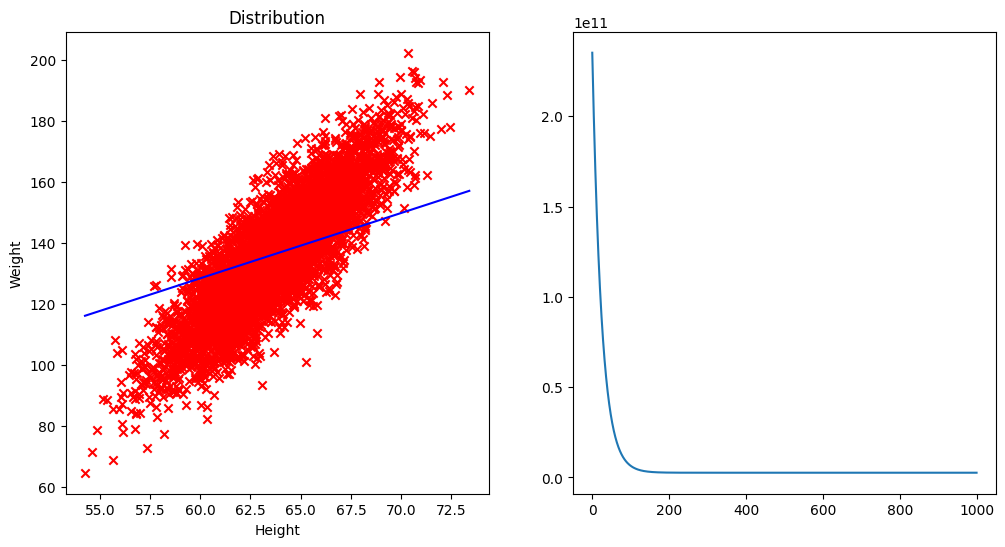

In [87]:
w,b,costHistory,wHistory,bHistory = gradientDescent(femaleData['Height'],femaleData['Weight'],0,0,5e-6,1001)

In [88]:
from linearRegression import gradientDescent